# Intro
In this project, I conduct an analysis on a videogame sales dataset I got from kaggle. I will preprocess the data here and then take my data to Tableau for visualization making.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
sns.set()

## Load in the data

In [2]:
with zipfile.ZipFile('archive.zip', 'r') as file:
    file.extractall()

In [3]:
raw_data = pd.read_csv('vgsales.csv')

## Data exploration

In [4]:
raw_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
raw_data.info

<bound method DataFrame.info of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sal

In [6]:
raw_data.Name.unique().shape

(11493,)

In [7]:
raw_data['Name'].value_counts()

Name
Need for Speed: Most Wanted      12
LEGO Marvel Super Heroes          9
Ratatouille                       9
Madden NFL 07                     9
FIFA 14                           9
                                 ..
Farming 2017 - The Simulation     1
Kinect Adventures!                1
Wii Fit Plus                      1
Wii Fit                           1
Nintendogs                        1
Name: count, Length: 11493, dtype: int64

In [8]:
raw_data[raw_data['Name'] == 'Need for Speed: Most Wanted']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


Curious as to why some games have repeats, I looked into the game title with the most occurances. As you can see, it's due to games that have copies for different platforms. In that case, I will leave the data as is.

In [9]:
raw_data.Platform.value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [10]:
raw_data.Publisher.value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New World Computing                1
Genterprise                        1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [11]:
raw_data.Genre.value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

## Cleaning

#### Null cleaning

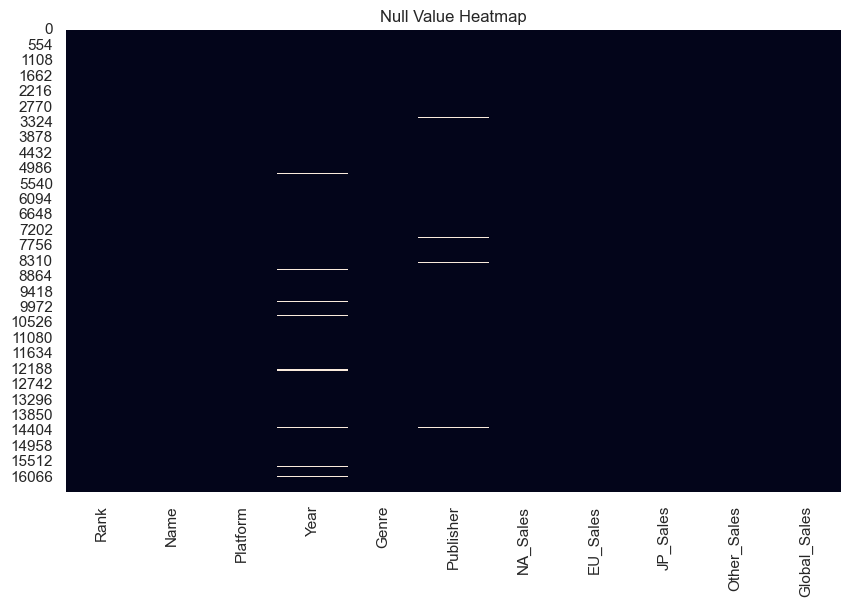

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(raw_data.isnull(), cbar=False)
plt.title('Null Value Heatmap')
plt.show()

In [13]:
raw_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Since nulls are few, we shall simply delete them.

In [14]:
clean_data = raw_data.copy()

In [15]:
clean_data = clean_data.dropna()

In [16]:
print(raw_data.shape)
print(clean_data.shape)

(16598, 11)
(16291, 11)


In [22]:
clean_data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### Make year values ints

In [17]:
clean_data.Year = clean_data.Year.astype(int)

#### Visual data exploration

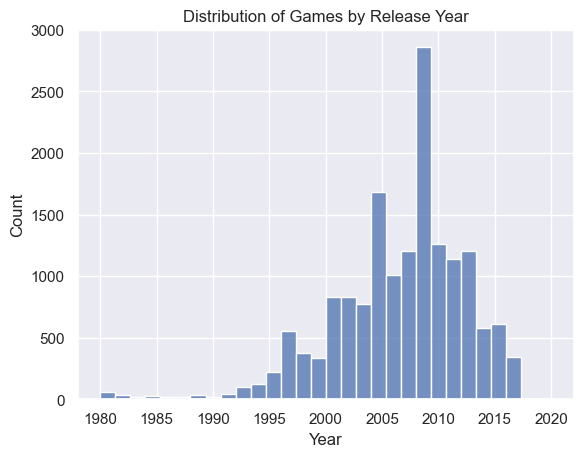

In [18]:
sns.histplot(clean_data['Year'].dropna(), bins=30, kde=False)
plt.title("Distribution of Games by Release Year")
plt.show()

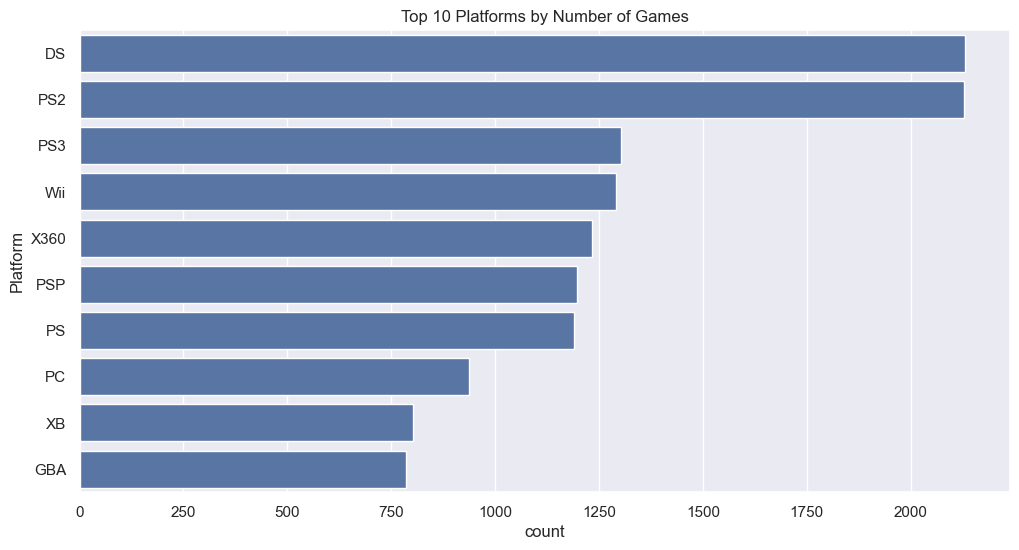

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(y="Platform", data=clean_data, order=clean_data['Platform'].value_counts().index[:10])
plt.title("Top 10 Platforms by Number of Games")
plt.show()

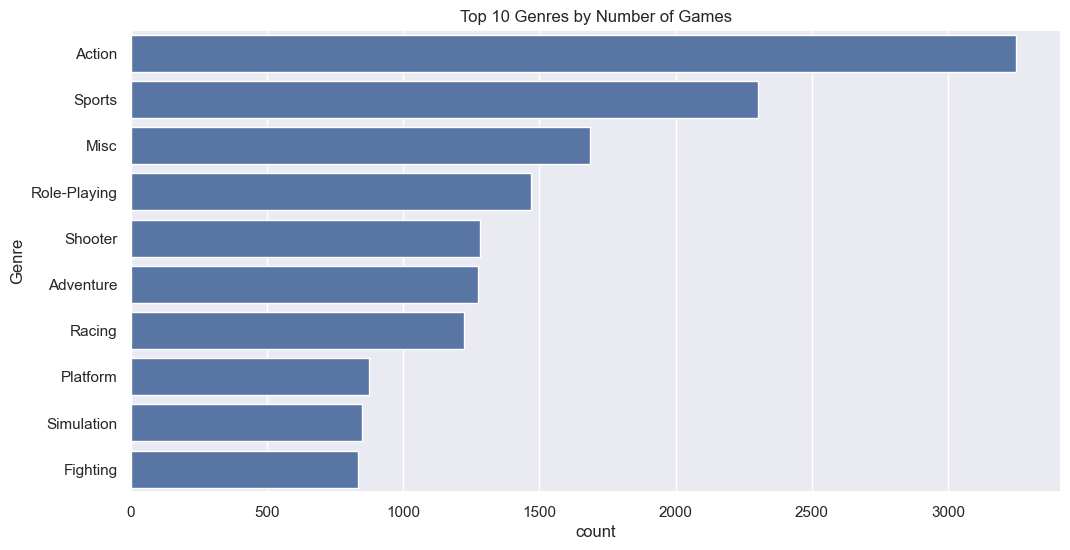

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(y='Genre', data=clean_data, order=clean_data['Genre'].value_counts().index[:10])
plt.title('Top 10 Genres by Number of Games')
plt.show()

In [21]:
vgsales = clean_data.copy()
vgsales.to_excel('vgsales_final.xlsx', sheet_name='Data')